In [1]:
import os 
from matplotlib import pyplot as plt
from natsort import natsorted

In [2]:
ROOT_DIR = "../../output/20240811_v4_new_dataloader_repeat0/val_unslpash-trainset/1.0/no_consistnacy"

plot_id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19] losses:  [0.12040834728524917, 0.12041255690467854, 0.12035947168349392, 0.12040465762838722, 0.12038266050060176, 0.12039135399584969, 0.12037424486803097, 0.1203674756300946, 0.12040429536977576, 0.12041204411846897, 0.12040122899019884, 0.12037325864140358, 0.1203791272516052, 0.120382643584162, 0.12039284334621496, 0.12040021103910274, 0.12037844272692584, 0.12034693837372792, 0.12033621058540625]
min_loss_id:  18
min_loss:  0.12033621058540625
min_plot_id:  19


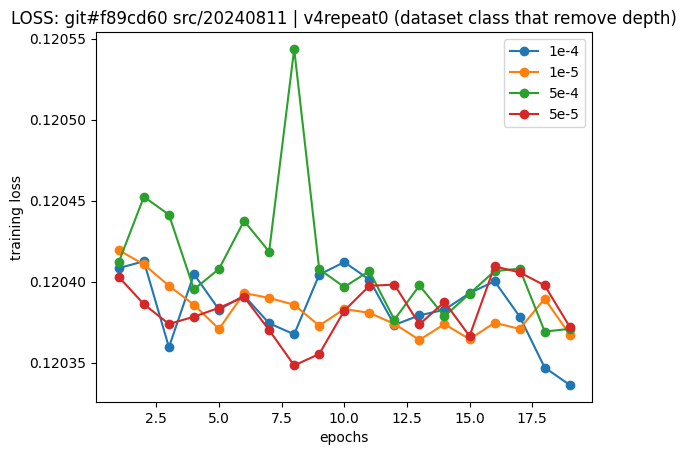

In [5]:
LRs = natsorted(os.listdir(ROOT_DIR))  
for lr in LRs:
    #checkpoints = natsorted(os.listdir(os.path.join(ROOT_DIR, lr)))
    checkpoints = ["chk{}".format(i) for i in range(1,20)]
    checkpoint_id = []
    avg_losses = []
    for checkpoint in checkpoints:
        # read all text files in directory and average to single float
        all_losses = []
        step_root_dir = os.path.join(ROOT_DIR, lr, checkpoint, 'lightning_logs/version_0/train_loss')
        step_dirs = natsorted(os.listdir(step_root_dir))
        for step_id in step_dirs:     
            for file in os.listdir(os.path.join(step_root_dir, step_id)):
                if file.endswith(".txt"):
                    with open(os.path.join(step_root_dir, step_id, file), 'r') as f:
                        all_losses.append(float(f.read()))       
        avg_loss = sum(all_losses) / len(all_losses)
        avg_losses.append(avg_loss)
        checkpoint_id.append(int(checkpoint.replace("chk","")))
    plt.plot(checkpoint_id, avg_losses, 'o-', label=lr)
    if lr == "1e-4":
        print("plot_id: ", checkpoint_id, "losses: ", avg_losses)
        # find the location that has the lowest loss
        min_loss = min(avg_losses)
        min_loss_id = avg_losses.index(min_loss)
        print("min_loss_id: ", min_loss_id)
        print("min_loss: ", min_loss)
        # print min plot_id
        print("min_plot_id: ", checkpoint_id[min_loss_id])
    plt.legend()
    plt.xlabel("epochs")
    plt.ylabel("training loss")
    #plt.title("Training loss average on timesteps [100,200,...,900]")
    plt.title("LOSS: git#f89cd60 src/20240811 | v4repeat0 (dataset class that remove depth)")